## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for monitar_target in ['val_loss', 'val_acc']:
    for wait_epochs in [10, 25]:
        
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


        earlystop = EarlyStopping(monitor=monitar_target, 
                                  patience=wait_epochs, 
                                  verbose=1
                                  )

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True,
                  callbacks=[earlystop]
                 )

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
        exp_name_tag = "monitor-{}, patience={}".format(monitar_target, wait_epochs)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batc

Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5424 - acc: 0.4578 - val_loss: 1.6222 - val_acc: 0.4324
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4892 - acc: 0.4771 - val_loss: 1.5881 - val_acc: 0.4476
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4448 - acc: 0.4938 - val_loss: 1.5788 - val_acc: 0.4519
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4068 - acc: 0.5071 - val_loss: 1.5454 - val_acc: 0.4613
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3720 - acc: 0.5210 - val_loss: 1.5184 - val_acc: 0.4665
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3398 - acc: 0.5326 - val_loss: 1.5065 - val_acc: 0.4690
Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3094 - acc: 0.5436 - val_loss: 1.4991 - val_acc: 0.4720
Epoch 11/50
50000/50000 [===============

Epoch 10/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.3006 - acc: 0.5481 - val_loss: 1.5036 - val_acc: 0.4726
Epoch 11/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.2722 - acc: 0.5599 - val_loss: 1.5025 - val_acc: 0.4698
Epoch 12/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2426 - acc: 0.5710 - val_loss: 1.4831 - val_acc: 0.4808
Epoch 13/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.2164 - acc: 0.5825 - val_loss: 1.4791 - val_acc: 0.4793
Epoch 14/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1919 - acc: 0.5883 - val_loss: 1.4727 - val_acc: 0.4815
Epoch 15/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1673 - acc: 0.5994 - val_loss: 1.4764 - val_acc: 0.4812
Epoch 16/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1424 - acc: 0.6090 - val_loss: 1.4728 - val_acc: 0.4825
Epoch 17/50
50000/50000 [=========

Epoch 18/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.1029 - acc: 0.6217 - val_loss: 1.4651 - val_acc: 0.4878
Epoch 19/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0812 - acc: 0.6283 - val_loss: 1.4655 - val_acc: 0.4886
Epoch 20/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0582 - acc: 0.6404 - val_loss: 1.4597 - val_acc: 0.4923
Epoch 21/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0370 - acc: 0.6468 - val_loss: 1.4595 - val_acc: 0.4879
Epoch 22/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0154 - acc: 0.6553 - val_loss: 1.4640 - val_acc: 0.4947
Epoch 23/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.9971 - acc: 0.6627 - val_loss: 1.4669 - val_acc: 0.4904
Epoch 24/50
50000/50000 [==============================] - 2s 41us/step - loss: 0.9738 - acc: 0.6716 - val_loss: 1.4770 - val_acc: 0.4859
Epoch 25/50
50000/50000 [=========

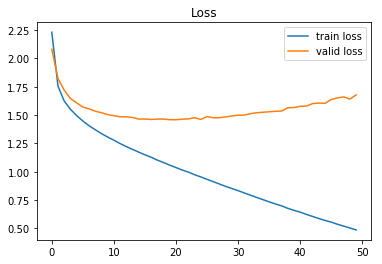

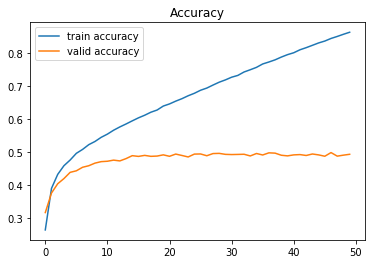

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()